# Data Collection & Pre-processing

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv("./heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Feature Engineering

In [59]:
df.shape

(918, 12)

In [60]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [61]:
df['FastingBS'].unique()

array([0, 1])

In [62]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [63]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [64]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [65]:
# Removing Negative values from the 'Oldpeak' column, as Peak value can't be negative
df = df.drop(df[df['Oldpeak']<0].index)

In [66]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000
mean,53.530387,132.659669,201.477348,0.227624,136.988950,0.914254,0.551381
std,9.426557,18.477599,107.719891,0.419531,25.330337,1.046944,0.497628
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000
25%,47.000000,120.000000,177.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,268.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [67]:
# Find Duplicate values in the DF
df.duplicated().sum()

0

In [68]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Label Encoding

In [69]:
columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for i in columns:
  df['{}'.format(i)] = label_encoder.fit_transform(df['{}'.format(i)])

# Outlier Handling

In [70]:
def remove_outliers_iqr(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    df = df[~outliers]

    return df

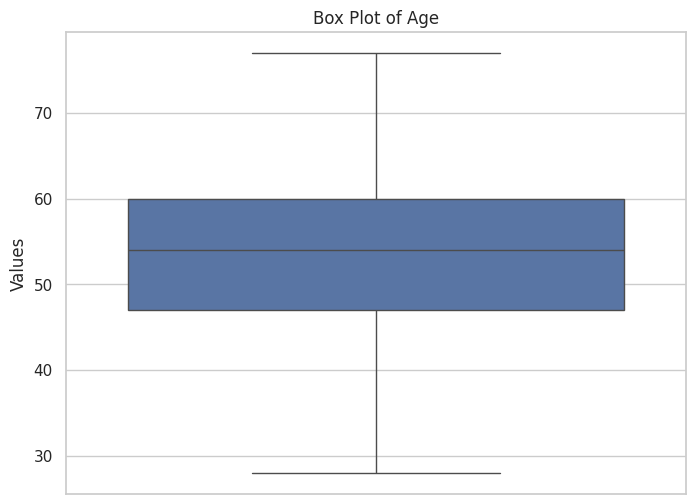

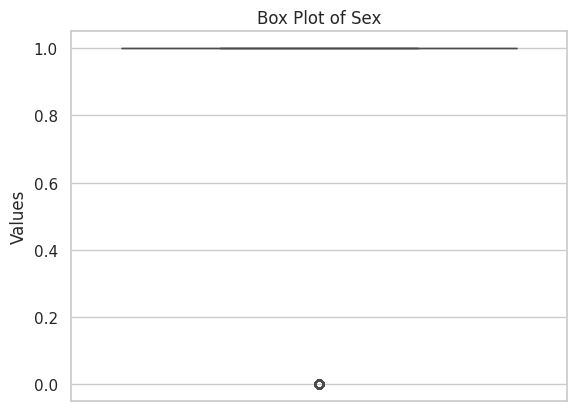

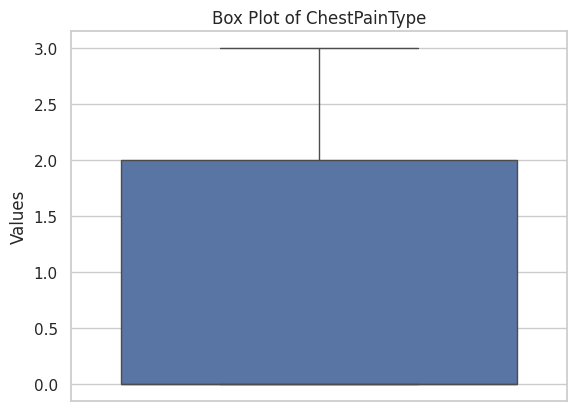

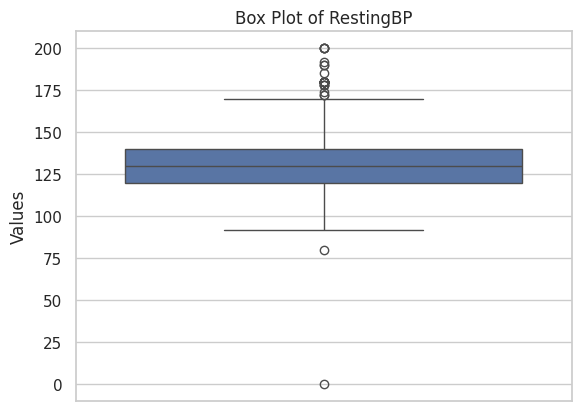

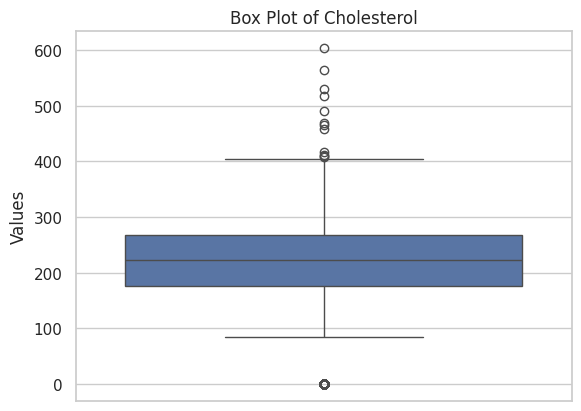

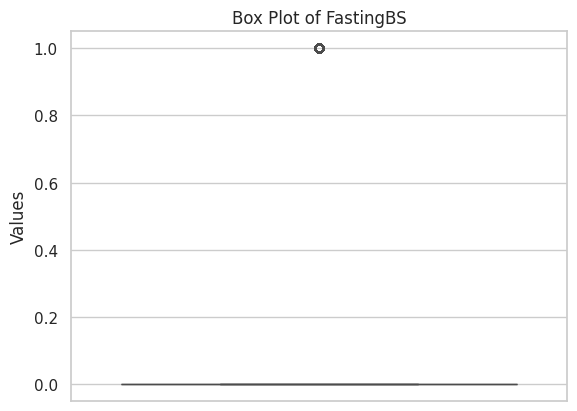

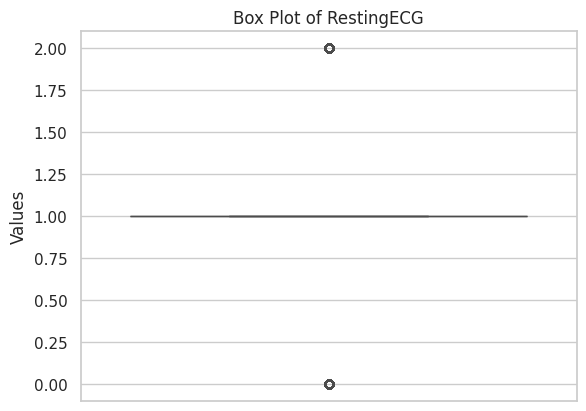

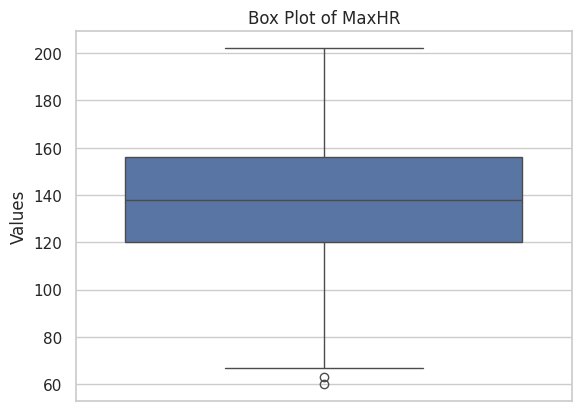

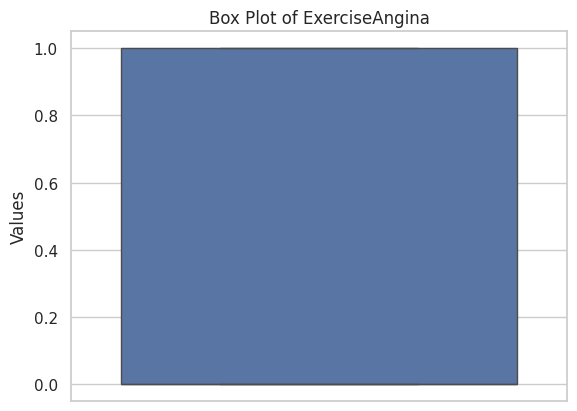

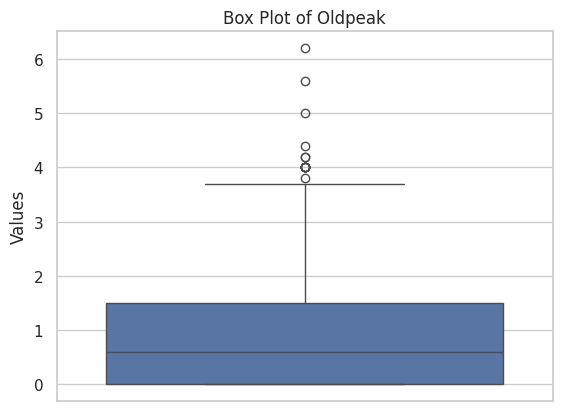

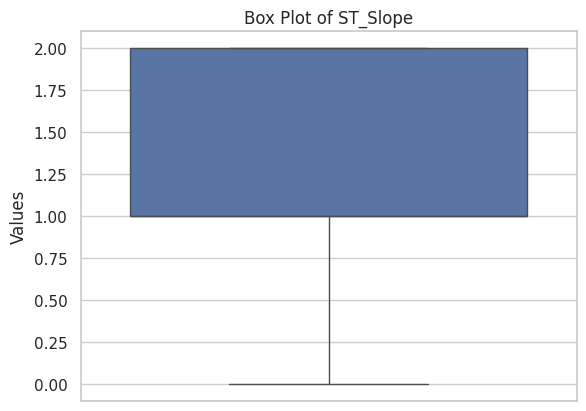

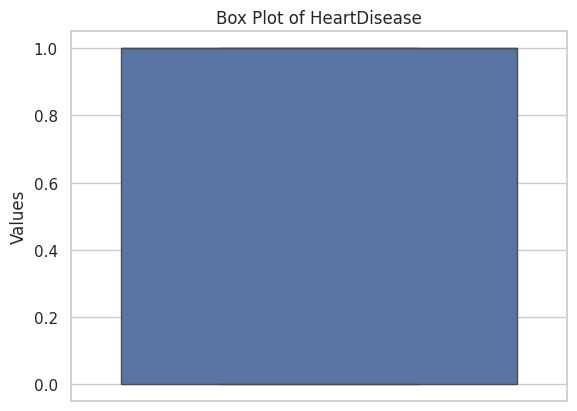

In [71]:
columns_to_check = df.columns.tolist()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))


for item in columns_to_check:
  sns.boxplot(data=df[item])

  plt.xlabel("".format(item))
  plt.ylabel("Values")
  plt.title("Box Plot of {}".format(item))
  plt.show()
  print('\n')

In [72]:
column = ['Sex', 'FastingBS', 'RestingECG', 'RestingECG', 'Oldpeak']

for item in column:
  Q1 = df[item].quantile(0.25)
  Q3 = df[item].quantile(0.75)
  IQR = Q3 - Q1
  whisker_width = 1.5
  lower_whisker = Q1 -(whisker_width*IQR)
  upper_whisker = Q3 + (whisker_width*IQR)
  df[item]=np.where(df[item]>upper_whisker,upper_whisker,np.where(df[item]<lower_whisker,lower_whisker,df[item]))

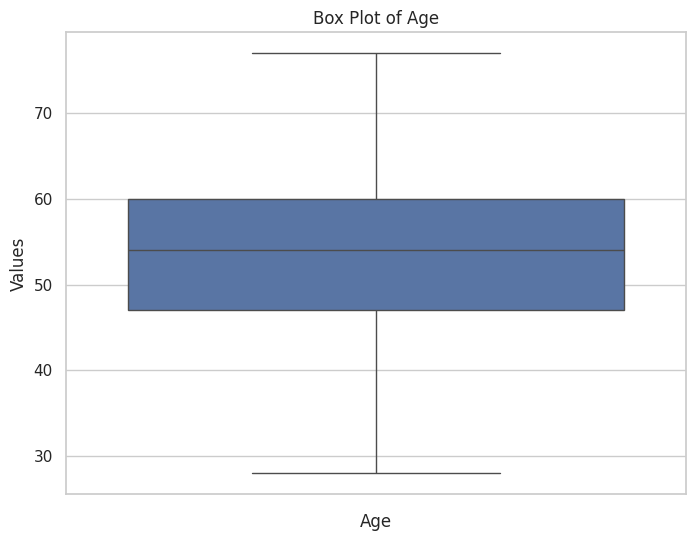

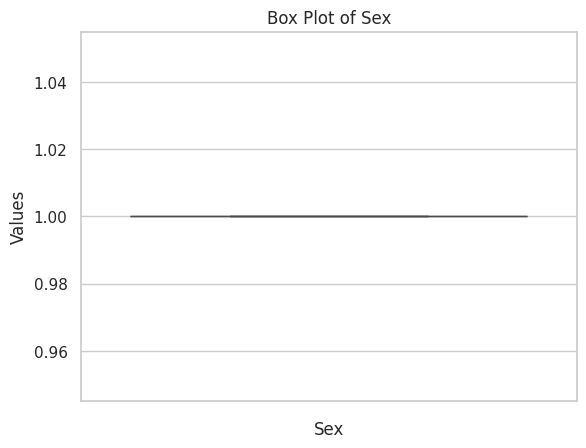

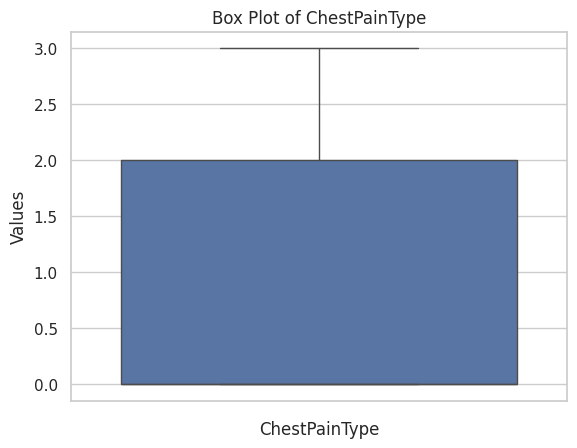

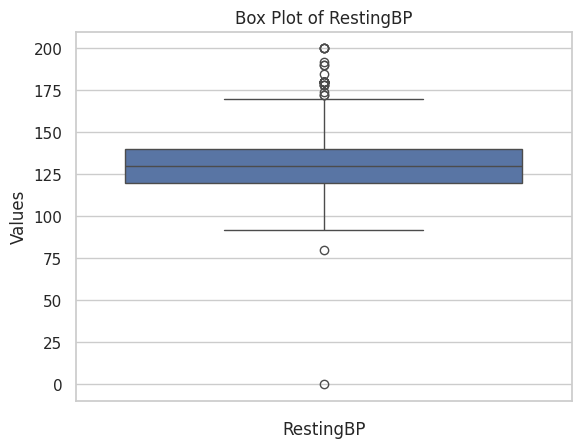

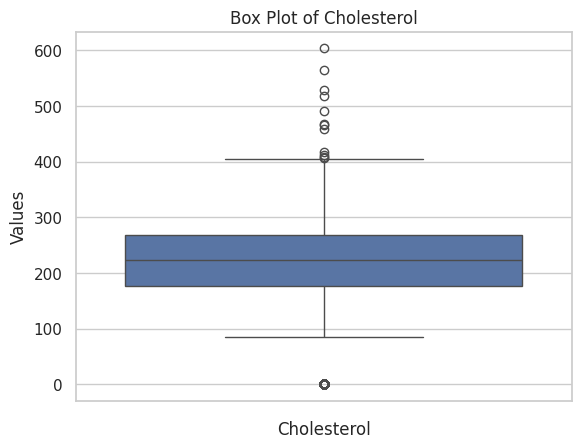

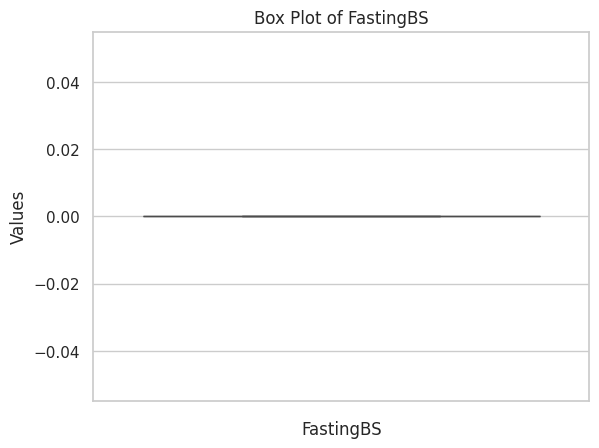

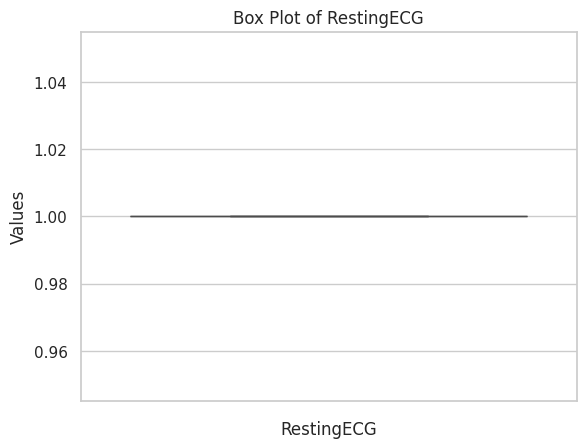

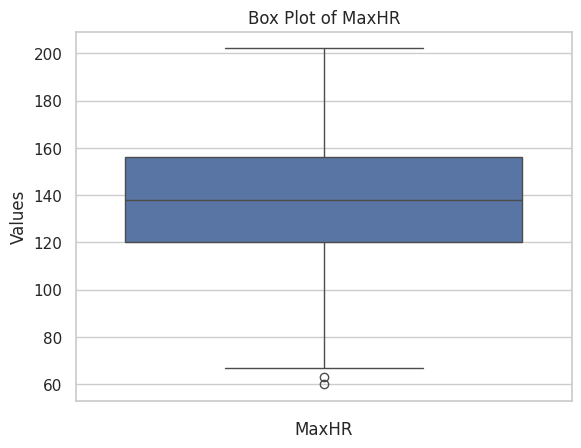

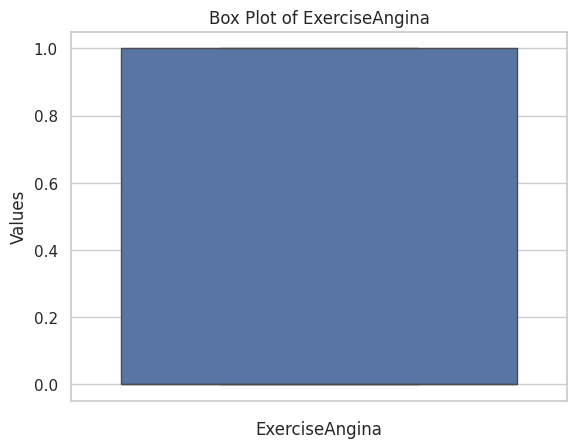

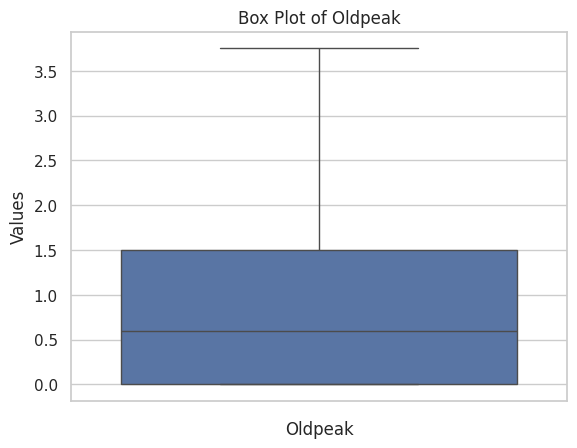

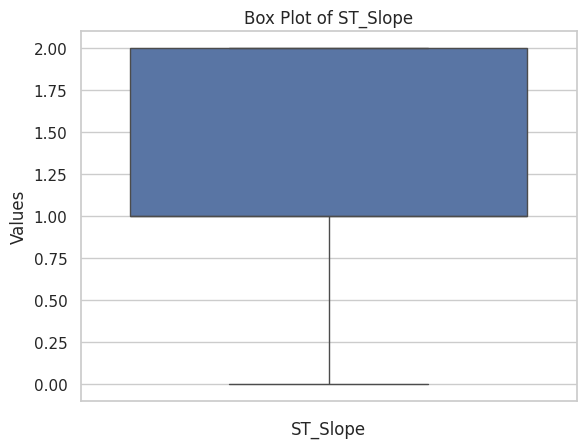

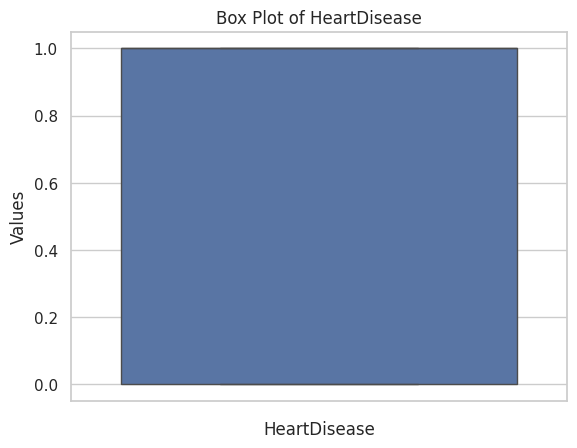

In [73]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

for item in columns_to_check:
  sns.boxplot(data=df[item])

  plt.xlabel('{}'.format(item))
  plt.ylabel("Values")
  plt.title("Box Plot of {}".format(item))
  plt.show()
  print("")

# X&Y Split

In [74]:
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

In [75]:
X.shape

(905, 11)

In [76]:
y.shape

(905,)

# Train - Test Split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
X_train.shape

(633, 11)

In [80]:
y_train.shape

(633,)

In [81]:
X_test.shape

(272, 11)

In [82]:
y_test.shape

(272,)

# Model Training

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [84]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [85]:
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

DecisionTreeRegressor()

In [86]:
model3 = RandomForestRegressor(n_estimators=100)
model3.fit(X_train, y_train)

RandomForestRegressor()

In [87]:
model4 = KNeighborsRegressor(n_neighbors=5)
model4.fit(X_train, y_train)

KNeighborsRegressor()

In [88]:
model5 = SVR(kernel='linear')
model5.fit(X_train, y_train)

SVR(kernel='linear')

# Model Evaluation

In [93]:
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
models = [model1, model2, model3, model4, model5]
for model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    model_name = type(model).__name__
    print(f'{model_name} Mean Squared Error: {mse*100:.2f}')

LinearRegression Mean Squared Error: 12.67
DecisionTreeRegressor Mean Squared Error: 23.16
RandomForestRegressor Mean Squared Error: 10.51
KNeighborsRegressor Mean Squared Error: 19.74
SVR Mean Squared Error: 13.60


In [90]:
for model in models:
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    model_name = type(model).__name__
    print(f'{model_name} Mean Squared Error: {r2*100:.2f}')

LinearRegression Mean Squared Error: 47.56
DecisionTreeRegressor Mean Squared Error: 4.11
RandomForestRegressor Mean Squared Error: 56.49
KNeighborsRegressor Mean Squared Error: 18.30
SVR Mean Squared Error: 43.70


# Visualisation

<ipython-input-94-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

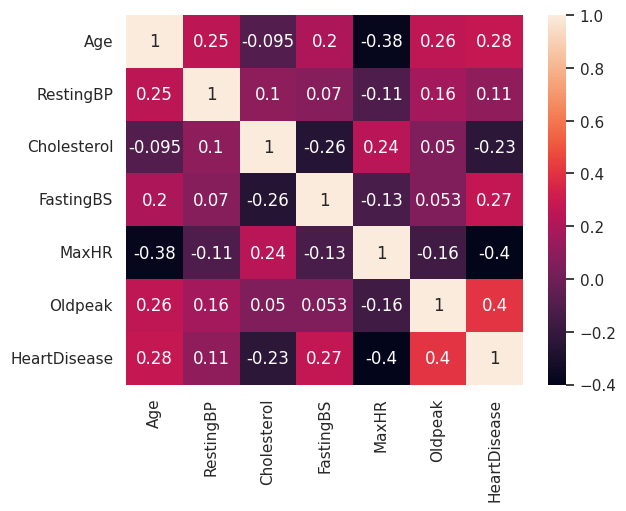

In [94]:
sns.heatmap(df.corr(), annot=True)

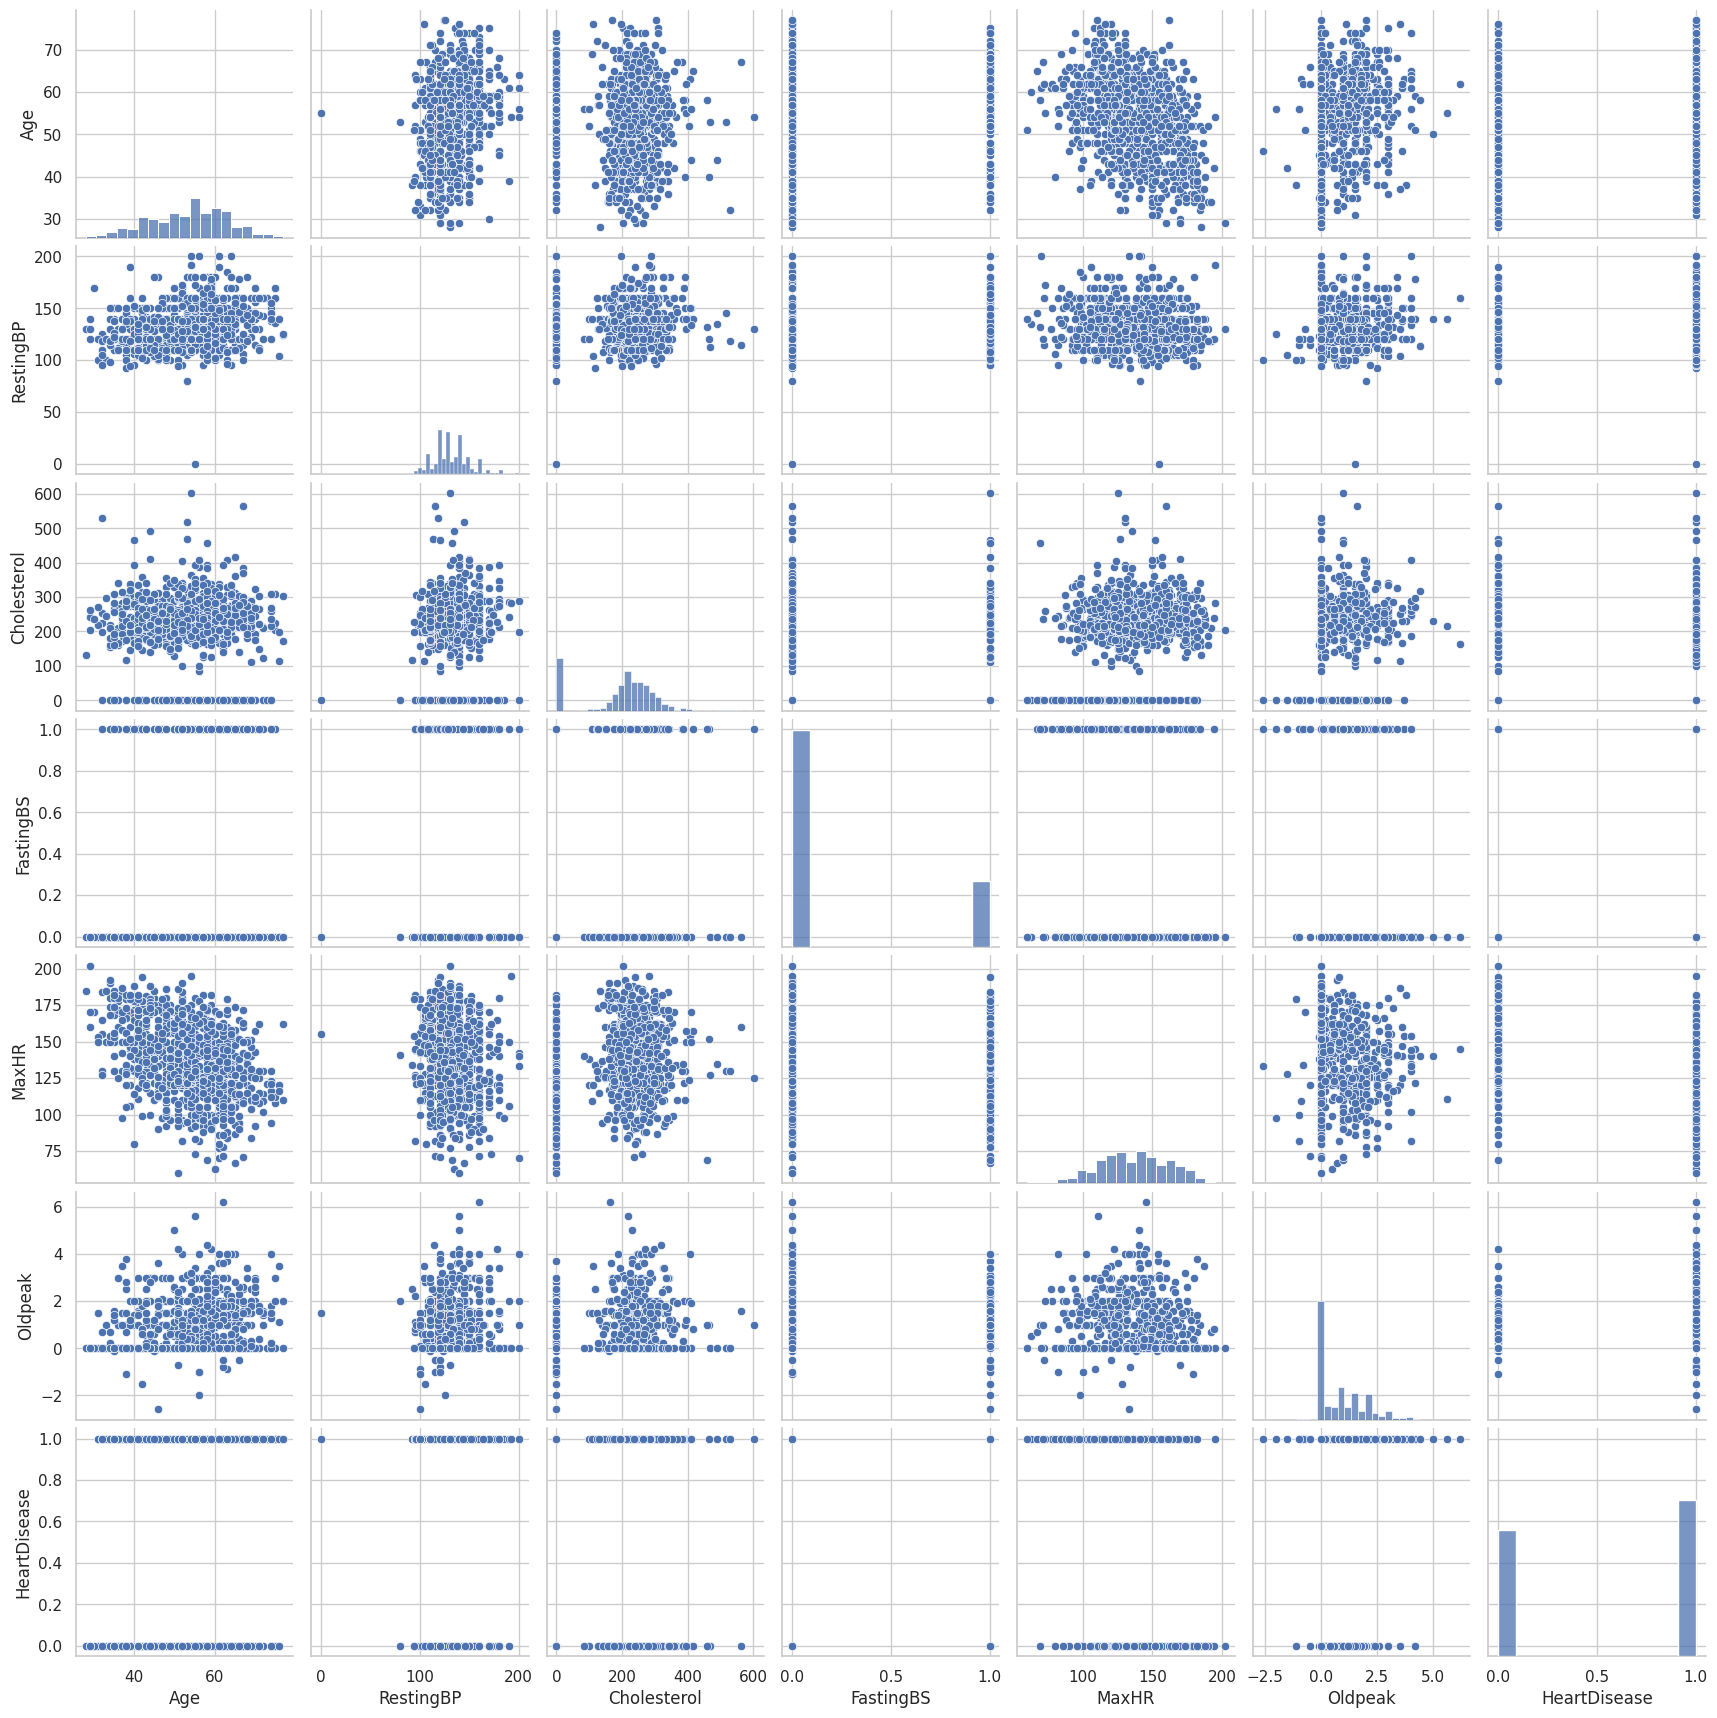

In [96]:
sns.pairplot(df)